In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics

In [3]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df = df.rename(columns={'PAY_0':'PAY_1'})

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_1                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [8]:
X = df.drop('default.payment.next.month',axis=1)
y = df['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [9]:
y_train.head()

16512    1
2406     0
14567    0
26180    0
139      0
Name: default.payment.next.month, dtype: int64

In [10]:
print(df['default.payment.next.month'].describe())
print('\n')
print(y_train.describe())
print('\n')
print(y_test.describe())

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default.payment.next.month, dtype: float64


count    22500.000000
mean         0.219200
std          0.413714
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default.payment.next.month, dtype: float64


count    7500.000000
mean        0.227200
std         0.419051
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: default.payment.next.month, dtype: float64


# ----------------------------------------------------------------------------------------------------------
# Lets predict the Class labels now "before fine tuning the parameters" so that we get the lower bound of our Prediction.
# ----------------------------------------------------------------------------------------------------------

# 1) Using Logistic Regresion

In [11]:
logmod = LogisticRegression()
logmod.fit(X_train, y_train)

C:\Users\Asim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
log_pred = logmod.predict(X_test)

In [13]:
print(confusion_matrix(y_test, log_pred))
print('\n')
print(classification_report(y_test, log_pred))
print('\n')
print(accuracy_score(y_test, log_pred))

[[5796    0]
 [1704    0]]


              precision    recall  f1-score   support

           0       0.77      1.00      0.87      5796
           1       0.00      0.00      0.00      1704

   micro avg       0.77      0.77      0.77      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.60      0.77      0.67      7500



0.7728


C:\Users\Asim\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asim\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asim\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# 2) Using Decision Tree

In [14]:
dtree = DecisionTreeClassifier(max_depth=10, random_state=14)
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

In [15]:
print(confusion_matrix(y_test, dtree_pred))
print('\n')
print(classification_report(y_test, dtree_pred))
print('\n')
print(accuracy_score(y_test, dtree_pred))

[[5381  415]
 [1042  662]]


              precision    recall  f1-score   support

           0       0.84      0.93      0.88      5796
           1       0.61      0.39      0.48      1704

   micro avg       0.81      0.81      0.81      7500
   macro avg       0.73      0.66      0.68      7500
weighted avg       0.79      0.81      0.79      7500



0.8057333333333333


# 3) Overfitting the Decision Tree
#### To verify that accouracy goes down on overfitting

In [16]:
dtree = DecisionTreeClassifier(max_depth=100, random_state=14)
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

In [17]:
print(confusion_matrix(y_test, dtree_pred))
print('\n')
print(classification_report(y_test, dtree_pred))
print('\n')
print(accuracy_score(y_test, dtree_pred))

[[4735 1061]
 [ 972  732]]


              precision    recall  f1-score   support

           0       0.83      0.82      0.82      5796
           1       0.41      0.43      0.42      1704

   micro avg       0.73      0.73      0.73      7500
   macro avg       0.62      0.62      0.62      7500
weighted avg       0.73      0.73      0.73      7500



0.7289333333333333


# 4) Using Linear Regression

In [18]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
lin_pred = linreg.predict(X_test)

C:\Users\Asim\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


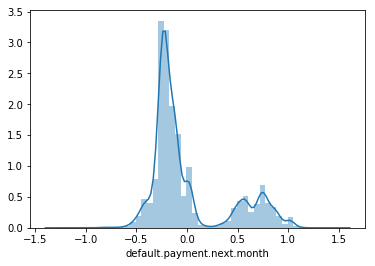

In [19]:
sns.distplot(y_test-lin_pred)

In [20]:
print(metrics.mean_absolute_error(y_test,lin_pred))
print(metrics.mean_squared_error(y_test,lin_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,lin_pred)))

0.31059641536470173
0.1538111849341749
0.39218769095188966


# 5) Using RandomForest

In [21]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=14)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [22]:
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))
print('\n')
print(accuracy_score(y_test, rfc_pred))

[[5498  298]
 [1072  632]]


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5796
           1       0.68      0.37      0.48      1704

   micro avg       0.82      0.82      0.82      7500
   macro avg       0.76      0.66      0.68      7500
weighted avg       0.80      0.82      0.80      7500



0.8173333333333334


# 6) Overfitting RandomForest

In [23]:
rfc = RandomForestClassifier(n_estimators=300, max_depth=200, random_state=14)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [24]:
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))
print('\n')
print(accuracy_score(y_test, rfc_pred))

[[5455  341]
 [1048  656]]


              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5796
           1       0.66      0.38      0.49      1704

   micro avg       0.81      0.81      0.81      7500
   macro avg       0.75      0.66      0.69      7500
weighted avg       0.80      0.81      0.80      7500



0.8148


# 7) DecisionTree Smarter way 

###### Using GridSearchCV, we will give a parameters space and test our model on every point of this space, returning the best combination of parameters.
###### Three different parameters that we will be tuning are : (i)Criterion (gini OR entropy), (ii)Max Depth of tree, (iii) Max # of leaf nodes, and (iv) Min sample split (limit to stop splitting, to avoid overfittiing)
#  

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
param_grid = {'max_depth':np.arange(3,15),
             'criterion': ['gini','entropy'],
             'max_leaf_nodes':[5,10,20,100],
              'min_samples_split':[2,5,10,20]}

In [27]:
import sklearn as sk

In [28]:
sk.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [29]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid,
                         cv=5, scoring='accuracy')

In [30]:
grid_tree.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'criterion': ['gini', 'entropy'], 'max_leaf_nodes': [5, 10, 20, 100], 'min_samples_split': [2, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [31]:
print(grid_tree.best_estimator_)
print(np.abs(grid_tree.best_score_))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=100,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.8233333333333334


# Now lets try DecisionTree with these optimized parameters

In [32]:
dtree = DecisionTreeClassifier(class_weight=None, criterion='gini', 
                               max_depth=3,max_features=None, 
                               max_leaf_nodes=10,min_impurity_decrease=0.0, 
                               min_impurity_split=None, 
                               min_samples_leaf=1, min_samples_split=2,
                               min_weight_fraction_leaf=0.0, presort=False, 
                               random_state=None, splitter='best')

In [33]:
dtree.fit(X_train,y_train)
optimized_dtree_pred = dtree.predict(X_test)

In [34]:
print(accuracy_score(y_test, optimized_dtree_pred))

0.8150666666666667


### We got +0.18% in accuracy by choosing the optimal parameters.

### Lets now visualise our tree

In [38]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

In [39]:
dot_data = StringIO()

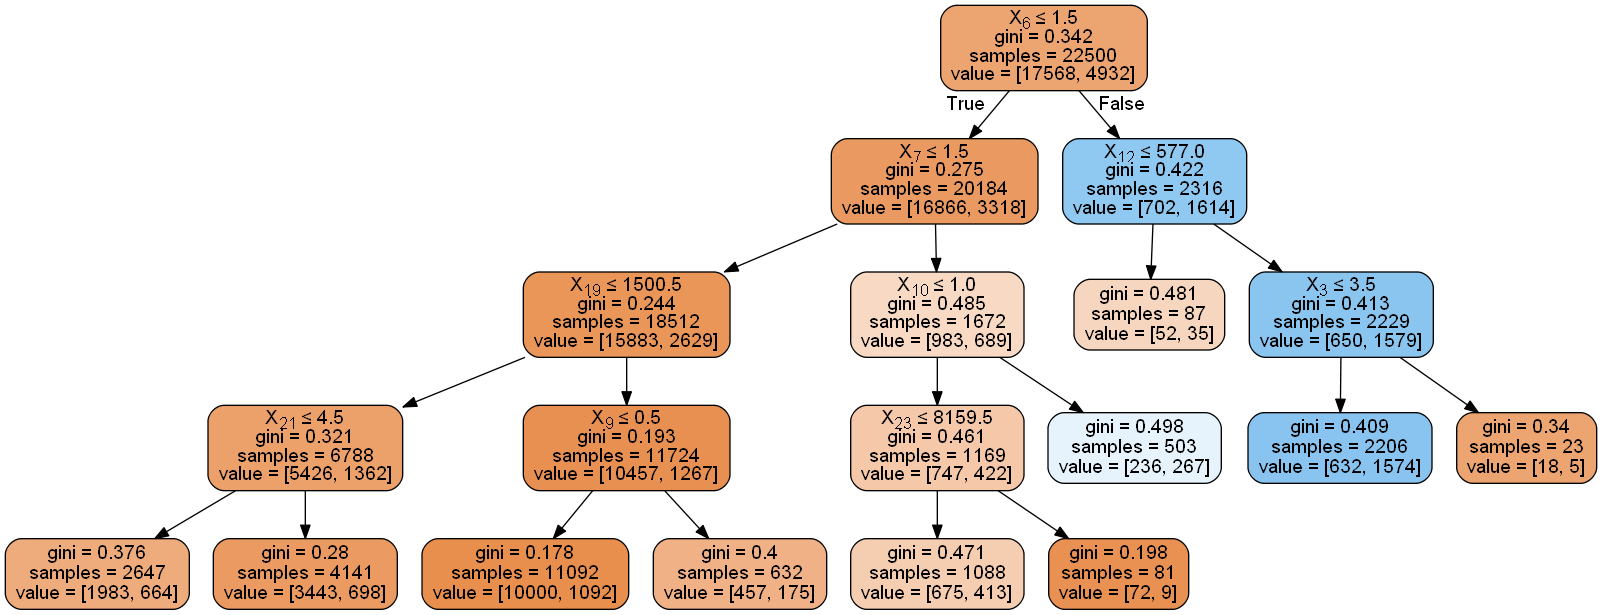

In [40]:
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True,
               special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [41]:
features = ['ID','LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [43]:
def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

get_feature_importance(dtree, features)

,feat,score
6,PAY_1,0.739348
7,PAY_2,0.140366
19,PAY_AMT2,0.046242
9,PAY_4,0.023896
21,PAY_AMT4,0.013724
10,PAY_5,0.012729
12,BILL_AMT1,0.009845
3,EDUCATION,0.007031
23,PAY_AMT6,0.006820
8,PAY_3,0.000000


### The above table of important features ("PAY_1" most important) is in agreement with our decision tree which took its root node as "PAY_1"

# ******************** DATA EXPLORATION ****************

### 1) Categorical Variables

###### (i) Sex

In [44]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

###### More Women than Men

###### (ii) Marriage

In [45]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

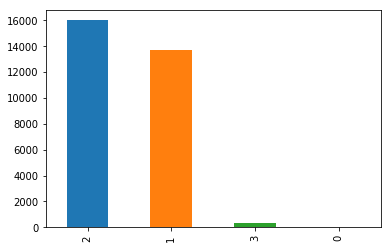

In [51]:
df.MARRIAGE.value_counts().plot(kind='bar')

###### Most of them are Married or Single.... Few are others(divorced, etc). Need to get rid of "0"

###### (iii) Education

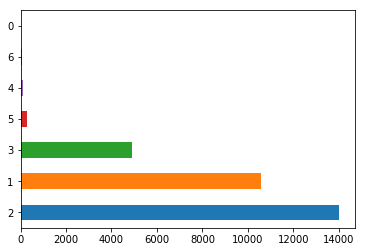

In [52]:
df['EDUCATION'].value_counts().plot(kind='barh')

###### Need a bit of cleaning here as well.

### 2) Numerical Attributes

###### (i) Bills